<IPython.core.display.Javascript object>


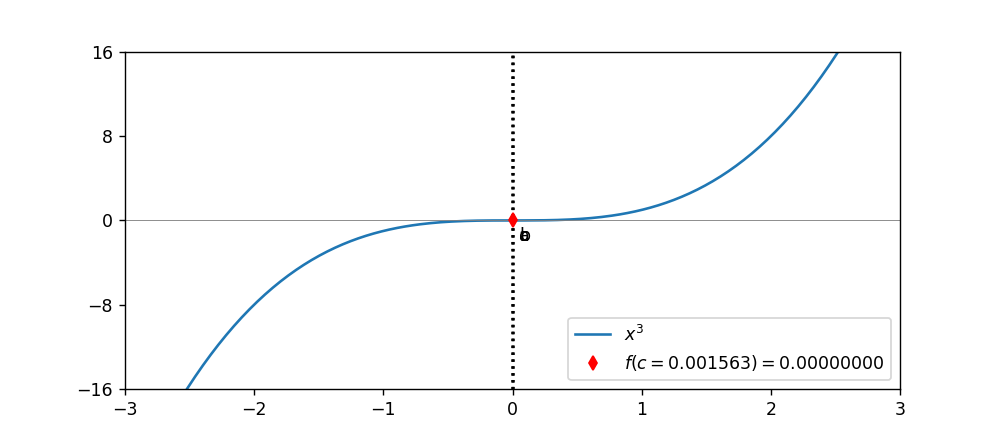

interactive(children=(IntSlider(value=0, description='step', max=9), Output()), _dom_classes=('widget-interact…

In [113]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import widgets
%matplotlib nbagg

x = np.linspace(-4, 6, 500)

f = lambda x: x**3

def f_line(f, df, x, x_n):
    slope = df(x_n)
    x_nn = x_n - f(x_n) / slope 
    return slope * (x - x_n) + f(x_n), x_nn

def update_plot(steps):
    a, b, c = -2.3, 2.5, 0
    ax.clear()
    ax.plot(x, f(x), label=r'$x^3$')
    ax.axhline(0, color='gray', lw=0.5)
    
    for i in range(steps):
        c = (a + b) / 2
        if f(a)*f(c) < 0:
            a = a
            b = c
        elif f(b)*f(c) < 0:
            a = c
            b = b
        
    c = (a+b)/2
    ax.vlines(a, -16, 16, color='black', linestyle=':')
    ax.annotate('a', (a+0.05, -2))
    ax.vlines(b, -16, 16, color='black', linestyle=':')
    ax.annotate('b', (b+0.05, -2))
    ax.plot(c, 0, 'kd', color='r', label=r'$f(c={:.6f})={:.8f}$'.format(c,f(c)))
    ax.annotate('c', (c+0.05, -2))

    plt.setp(ax, xticks=[-3, -2, -1, 0, 1, 2, 3], yticks=[-16, -8, 0, 8, 16])
    ax.set_ylim(-16, 16)
    ax.set_xlim(-3, 3)
    ax.legend(loc=4)
    plt.show()

fig, ax = plt.subplots(1, figsize=(8, 3.5))
steps = widgets.IntSlider(min=0, max=9, value=0, description='step')
widgets.interactive(update_plot, steps=steps)

In [37]:
def bisection(f, a, b, eps, max_iters):
    if f(a) * f(b) > 0:
        print('Bisection method needs that f(a)*f(b) < 0.')

    i = 0
    while abs(a-b) > eps and i <= max_iters:
        i = i + 1
        c = (a + b) / 2
        if f(a)*f(c) < 0:
            a = a
            b = c
        elif f(b)*f(c) < 0:
            a = c
            b = b
        elif f(c) == 0:
            print('Found exact solution: x = {:.8f}.'.format(c))
            break
    
    print('Converged to x = {:.8f} in {} steps.'.format((a + b) / 2, i-1))

In [76]:
import numpy as np

f = lambda x: x**3
bisection(f, -2.3, 2.5, 1e-8, 36)

Converged to x = 0.00000000 in 28 steps.
